In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
plt.style.use('science')
qt.settings.auto_tidyup = True
import time

In [7]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

# Performance of direct integration

## $\hat{A} = \hat{a}$

In [36]:
# defining input parameters
N = 200 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 1.0 # decay rate 
omega = 1.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="analytic")
coplist = [np.sqrt(gamma) * a]
# result = qt.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.

In [37]:
%timeit result = qt.mesolve(H, psi0, tlist, coplist, [])

829 ms ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## $\hat{A} = \hat{a}\left(\hat{a}^\dagger \hat{a} - 1\right)$

In [45]:
options=qt.Options(nsteps=10000)
# options=qt.Options()
# defining input parameters
N = 100 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 1.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="operator")
# psi0 = (qt.fock(N, 8) + qt.fock(N, 9) + qt.fock(N, 1) + qt.fock(N, 3) + qt.fock(N, 4) + qt.fock(N, 6)).unit()
coplist = [np.sqrt(gamma) * a*(n - 1)]

In [46]:
start_time = time.time()
result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
end_time = time.time()
print(end_time - start_time)

110.25300598144531


In [44]:
%timeit result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)

11.3 s ± 1.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Performance of quantum Monte-Carlo

## $\hat{A} = \hat{a}$

In [8]:
# defining input parameters
N = 200 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 8.0 # decay rate 
omega = 1.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="analytic")
coplist = [np.sqrt(gamma) * a]
eoplist = [ad * a]
# result = qt.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.

In [9]:
result = qt.mcsolve(H, psi0, tlist, coplist, eoplist, ntraj=500)

10.0%. Run time:   6.87s. Est. time left: 00:00:01:01
20.0%. Run time:   8.10s. Est. time left: 00:00:00:32
30.0%. Run time:   9.39s. Est. time left: 00:00:00:21
40.0%. Run time:  10.70s. Est. time left: 00:00:00:16
50.0%. Run time:  12.02s. Est. time left: 00:00:00:12
60.0%. Run time:  13.44s. Est. time left: 00:00:00:08
70.0%. Run time:  14.82s. Est. time left: 00:00:00:06
80.0%. Run time:  16.12s. Est. time left: 00:00:00:04
90.0%. Run time:  17.44s. Est. time left: 00:00:00:01
100.0%. Run time:  18.92s. Est. time left: 00:00:00:00
Total run time:  19.08s


## $\hat{A} = \hat{a}\left(\hat{a}^\dagger \hat{a} - 1\right)$

In [53]:
# defining input parameters
N = 20 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 1.0 # decay rate 
omega = 0.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="analytic")
coplist = [np.sqrt(gamma) * a*(n - 1)]
eoplist = [ad * a]
# result = qt.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.

In [54]:
result = qt.mcsolve(H, psi0, tlist, coplist, eoplist, ntraj=500)

10.0%. Run time:   7.48s. Est. time left: 00:00:01:07
20.0%. Run time:   8.77s. Est. time left: 00:00:00:35
30.0%. Run time:  10.10s. Est. time left: 00:00:00:23
40.0%. Run time:  11.60s. Est. time left: 00:00:00:17
50.0%. Run time:  12.90s. Est. time left: 00:00:00:12
60.0%. Run time:  14.27s. Est. time left: 00:00:00:09
70.0%. Run time:  15.76s. Est. time left: 00:00:00:06
80.0%. Run time:  17.63s. Est. time left: 00:00:00:04
90.0%. Run time:  19.82s. Est. time left: 00:00:00:02
100.0%. Run time:  21.46s. Est. time left: 00:00:00:00
Total run time:  21.62s


In [ ]:
# defining input parameters
N = 100 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 1.0 # decay rate 
omega = 1.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="analytic")
coplist = [np.sqrt(gamma) * a*(n - 1)]
eoplist = [ad * a]
# result = qt.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.

In [ ]:
result = qt.mcsolve(H, psi0, tlist, coplist, eoplist, ntraj=500)

In [ ]:
# defining input parameters
N = 100 # hilbert space size
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma = 1.0 # decay rate 
omega = 1.0 # free Hamiltonian frequency 
alphain = 3.0 # input coherent state amplitude

# defining operators
a = qt.destroy(N) # annihilation operator
n = qt.num(N) # number operator 
ad = a.dag() # creation operator 
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)

# defining Hamiltonian
H = omega * ad * a


# input state
psi0 = qt.coherent(N, alphain, method="analytic")
coplist = [np.sqrt(gamma) * a*(n - 1)]
eoplist = [ad * a]
# result = qt.mesolve(H, psi0, tlist, coplist, [])

# result.states gives a list of density matrices, corresponding to 
# the state at each timestep.

In [28]:
result.expect[0]

array([9.        , 5.7396722 , 4.66042494, 4.05099663, 3.66145986,
       3.37616134, 3.16077428, 2.98660774, 2.84203476, 2.72660627,
       2.62212573, 2.5332035 , 2.45596932, 2.37707097, 2.31458222,
       2.25106253, 2.20495054, 2.15516878, 2.10915037, 2.0684192 ,
       2.03507274, 2.000453  , 1.96948631, 1.94194701, 1.91542024,
       1.89542966, 1.87430254, 1.85217601, 1.82962501, 1.80889738,
       1.78900227, 1.76227721, 1.73828991, 1.7194429 , 1.70194274,
       1.68662537, 1.6728922 , 1.65776243, 1.63921378, 1.62657381,
       1.60974626, 1.59674244, 1.58196918, 1.57336453, 1.5634862 ,
       1.54719853, 1.53918733, 1.53099041, 1.52179362, 1.50347687,
       1.49166229, 1.48029252, 1.47104542, 1.46336007, 1.45500565,
       1.44407706, 1.43501432, 1.43123996, 1.42441458, 1.41515451,
       1.40589349, 1.40105874, 1.39196545, 1.38621855, 1.37815642,
       1.37236269, 1.36535953, 1.35117105, 1.34560608, 1.34025318,
       1.3372529 , 1.33399691, 1.32516286, 1.31666077, 1.30929

# Full single-mode model eqn

In [23]:
def single_mode_solver(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=np.linspace(0, 0.2, 100)):
    
    # parameters
    omega = 0
    ntraj = 500
    
    # input state
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qt.destroy(dims)
    ad = a.dag()
    n = qt.num(dims)
    
    # collapse operators
    c_op_list = [np.sqrt(gamma_1) * a, np.sqrt(gamma_2) * a * a, np.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n]
        return qt.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [61]:
qt.coherent_dm(35, 3, method="analytic").norm()

1.0000001000315688

In [24]:
dims_test = 35
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 3.0
start_time = time.time()
result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
end_time = time.time()
print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

0.062497854232788086
10.0%. Run time:   7.91s. Est. time left: 00:00:01:11
20.0%. Run time:   8.34s. Est. time left: 00:00:00:33
30.0%. Run time:   8.78s. Est. time left: 00:00:00:20
40.0%. Run time:   9.24s. Est. time left: 00:00:00:13
50.0%. Run time:   9.91s. Est. time left: 00:00:00:09


KeyboardInterrupt: 

In [70]:
dims_test = 50
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 5.0
start_time = time.time()
result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
end_time = time.time()
print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

0.1149287223815918
10.0%. Run time:   7.65s. Est. time left: 00:00:01:08
20.0%. Run time:   8.05s. Est. time left: 00:00:00:32
30.0%. Run time:   8.38s. Est. time left: 00:00:00:19
40.0%. Run time:   8.73s. Est. time left: 00:00:00:13
50.0%. Run time:   9.12s. Est. time left: 00:00:00:09
60.0%. Run time:   9.48s. Est. time left: 00:00:00:06
70.0%. Run time:   9.82s. Est. time left: 00:00:00:04
80.0%. Run time:  10.17s. Est. time left: 00:00:00:02
90.0%. Run time:  10.51s. Est. time left: 00:00:00:01
100.0%. Run time:  10.88s. Est. time left: 00:00:00:00
Total run time:  11.05s


In [73]:
dims_test = 100
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 8.0
start_time = time.time()
result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
end_time = time.time()
print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

0.31980156898498535
10.0%. Run time:   7.60s. Est. time left: 00:00:01:08
20.0%. Run time:   8.37s. Est. time left: 00:00:00:33
30.0%. Run time:   9.12s. Est. time left: 00:00:00:21
40.0%. Run time:   9.86s. Est. time left: 00:00:00:14
50.0%. Run time:  10.60s. Est. time left: 00:00:00:10
60.0%. Run time:  11.31s. Est. time left: 00:00:00:07
70.0%. Run time:  12.03s. Est. time left: 00:00:00:05
80.0%. Run time:  12.79s. Est. time left: 00:00:00:03
90.0%. Run time:  13.57s. Est. time left: 00:00:00:01
100.0%. Run time:  14.66s. Est. time left: 00:00:00:00
Total run time:  14.84s


In [78]:
dims_test = 200
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 12.0
start_time = time.time()
result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
end_time = time.time()
print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

4.047503232955933
10.0%. Run time:   8.52s. Est. time left: 00:00:01:16
20.0%. Run time:  10.84s. Est. time left: 00:00:00:43
30.0%. Run time:  13.13s. Est. time left: 00:00:00:30
40.0%. Run time:  15.56s. Est. time left: 00:00:00:23
50.0%. Run time:  17.93s. Est. time left: 00:00:00:17
60.0%. Run time:  20.24s. Est. time left: 00:00:00:13
70.0%. Run time:  22.46s. Est. time left: 00:00:00:09
80.0%. Run time:  24.85s. Est. time left: 00:00:00:06
90.0%. Run time:  27.18s. Est. time left: 00:00:00:03
100.0%. Run time:  29.58s. Est. time left: 00:00:00:00
Total run time:  29.68s


In [83]:
dims_test = 500
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 20.0
start_time = time.time()
result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
end_time = time.time()
print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

332.3200571537018
10.0%. Run time:  19.53s. Est. time left: 00:00:02:55
20.0%. Run time:  33.22s. Est. time left: 00:00:02:12
30.0%. Run time:  47.54s. Est. time left: 00:00:01:50
40.0%. Run time:  61.81s. Est. time left: 00:00:01:32
50.0%. Run time:  76.63s. Est. time left: 00:00:01:16
60.0%. Run time:  90.56s. Est. time left: 00:00:01:00
70.0%. Run time: 105.22s. Est. time left: 00:00:00:45
80.0%. Run time: 117.12s. Est. time left: 00:00:00:29
90.0%. Run time: 129.67s. Est. time left: 00:00:00:14
100.0%. Run time: 143.65s. Est. time left: 00:00:00:00
Total run time: 143.84s


In [4]:
qt.coherent_dm(750, 25.0, method="analytic").norm()

1.000161270394437

In [6]:
dims_test = 750
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 25.0
# start_time = time.time()
# result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
# end_time = time.time()
# print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

10.0%. Run time:  32.87s. Est. time left: 00:00:04:55
20.0%. Run time:  58.50s. Est. time left: 00:00:03:54
30.0%. Run time:  81.89s. Est. time left: 00:00:03:11
40.0%. Run time: 102.24s. Est. time left: 00:00:02:33
50.0%. Run time: 122.57s. Est. time left: 00:00:02:02
60.0%. Run time: 143.03s. Est. time left: 00:00:01:35
70.0%. Run time: 162.63s. Est. time left: 00:00:01:09
80.0%. Run time: 183.42s. Est. time left: 00:00:00:45
90.0%. Run time: 203.70s. Est. time left: 00:00:00:22
100.0%. Run time: 223.88s. Est. time left: 00:00:00:00
Total run time: 224.00s


In [13]:
dims_test = 1500
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 37.0
# start_time = time.time()
# result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
# end_time = time.time()
# print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

10.0%. Run time: 100.30s. Est. time left: 00:00:15:02
20.0%. Run time: 170.75s. Est. time left: 00:00:11:23
30.0%. Run time: 237.55s. Est. time left: 00:00:09:14
40.0%. Run time: 301.65s. Est. time left: 00:00:07:32
50.0%. Run time: 383.73s. Est. time left: 00:00:06:23
60.0%. Run time: 461.27s. Est. time left: 00:00:05:07
70.0%. Run time: 527.77s. Est. time left: 00:00:03:46
80.0%. Run time: 594.34s. Est. time left: 00:00:02:28
90.0%. Run time: 664.78s. Est. time left: 00:00:01:13
100.0%. Run time: 752.94s. Est. time left: 00:00:00:00
Total run time: 753.05s


In [32]:
dims_test = 1950
gamma_2 = 0.0005
gamma_3 = 0.002
gamma_1 = 10
alpha_test = 38.0
# start_time = time.time()
# result_me = single_mode_solver("me", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)
# end_time = time.time()
# print(end_time - start_time)
result_mc  = single_mode_solver("mc", dims_test, alpha_test, gamma_1, gamma_2, gamma_3)

10.0%. Run time: 198.45s. Est. time left: 00:00:29:46
20.0%. Run time: 328.81s. Est. time left: 00:00:21:55
30.0%. Run time: 449.59s. Est. time left: 00:00:17:29
40.0%. Run time: 567.39s. Est. time left: 00:00:14:11
50.0%. Run time: 703.73s. Est. time left: 00:00:11:43
60.0%. Run time: 808.30s. Est. time left: 00:00:08:58
70.0%. Run time: 914.01s. Est. time left: 00:00:06:31
80.0%. Run time: 1066.18s. Est. time left: 00:00:04:26
90.0%. Run time: 1176.39s. Est. time left: 00:00:02:10
100.0%. Run time: 1361.63s. Est. time left: 00:00:00:00
Total run time: 1361.71s


# Comparisons graph

In [8]:
# times=np.linspace(0, 0.5, 100)
times=np.linspace(0, 0.2, 100)
def single_mode_solver(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=500, times=times):
    
    # parameters
    omega = 0
#     ntraj = 500
    
    # input state
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qt.destroy(dims)
    ad = a.dag()
    n = qt.num(dims)
    
    # collapse operators
    c_op_list = [np.sqrt(gamma_1) * a, np.sqrt(gamma_2) * a * a, np.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n]
        return qt.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [9]:
qt.coherent_dm(250, 14.0, method="analytic").norm()

0.9999519641428566

In [16]:
dims = 250
alpha_in = 14.0
gamma_1 = 0.0
gamma_2 = 0.0005
gamma_3 = 0.002
sol_DI = single_mode_solver("me", dims, alpha_in, gamma_1, gamma_2, gamma_3)

In [17]:
sol_QMC_10 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=10)

10.0%. Run time:   7.60s. Est. time left: 00:00:01:08
20.0%. Run time:   7.62s. Est. time left: 00:00:00:30
30.0%. Run time:   7.68s. Est. time left: 00:00:00:17
40.0%. Run time:   7.81s. Est. time left: 00:00:00:11
50.0%. Run time:   8.09s. Est. time left: 00:00:00:08
60.0%. Run time:   8.10s. Est. time left: 00:00:00:05
70.0%. Run time:   8.15s. Est. time left: 00:00:00:03
80.0%. Run time:   8.25s. Est. time left: 00:00:00:02
90.0%. Run time:   8.48s. Est. time left: 00:00:00:00
100.0%. Run time:   8.49s. Est. time left: 00:00:00:00
Total run time:   8.59s


In [18]:
sol_QMC_25 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=25)

12.0%. Run time:   7.93s. Est. time left: 00:00:00:58
20.0%. Run time:   8.30s. Est. time left: 00:00:00:33
32.0%. Run time:   8.56s. Est. time left: 00:00:00:18
40.0%. Run time:   8.87s. Est. time left: 00:00:00:13
52.0%. Run time:   9.40s. Est. time left: 00:00:00:08
60.0%. Run time:   9.46s. Est. time left: 00:00:00:06
72.0%. Run time:  10.15s. Est. time left: 00:00:00:03
80.0%. Run time:  10.50s. Est. time left: 00:00:00:02
92.0%. Run time:  10.93s. Est. time left: 00:00:00:00
100.0%. Run time:  11.26s. Est. time left: 00:00:00:00
Total run time:  11.34s


In [19]:
sol_QMC_50 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=50)

10.0%. Run time:   9.33s. Est. time left: 00:00:01:23
20.0%. Run time:  10.00s. Est. time left: 00:00:00:40
30.0%. Run time:  10.78s. Est. time left: 00:00:00:25
40.0%. Run time:  11.58s. Est. time left: 00:00:00:17
50.0%. Run time:  12.74s. Est. time left: 00:00:00:12
60.0%. Run time:  13.45s. Est. time left: 00:00:00:08
70.0%. Run time:  14.05s. Est. time left: 00:00:00:06
80.0%. Run time:  15.02s. Est. time left: 00:00:00:03
90.0%. Run time:  16.00s. Est. time left: 00:00:00:01
100.0%. Run time:  17.05s. Est. time left: 00:00:00:00
Total run time:  17.38s


In [20]:
sol_QMC_500 = single_mode_solver("mc", dims, alpha_in, gamma_1, gamma_2, gamma_3, ntraj=500)

10.0%. Run time:  14.85s. Est. time left: 00:00:02:13
20.0%. Run time:  20.59s. Est. time left: 00:00:01:22
30.0%. Run time:  25.89s. Est. time left: 00:00:01:00
40.0%. Run time:  31.13s. Est. time left: 00:00:00:46
50.0%. Run time:  37.95s. Est. time left: 00:00:00:37
60.0%. Run time:  43.14s. Est. time left: 00:00:00:28
70.0%. Run time:  48.39s. Est. time left: 00:00:00:20
80.0%. Run time:  54.16s. Est. time left: 00:00:00:13
90.0%. Run time:  59.47s. Est. time left: 00:00:00:06
100.0%. Run time:  64.93s. Est. time left: 00:00:00:00
Total run time:  65.06s


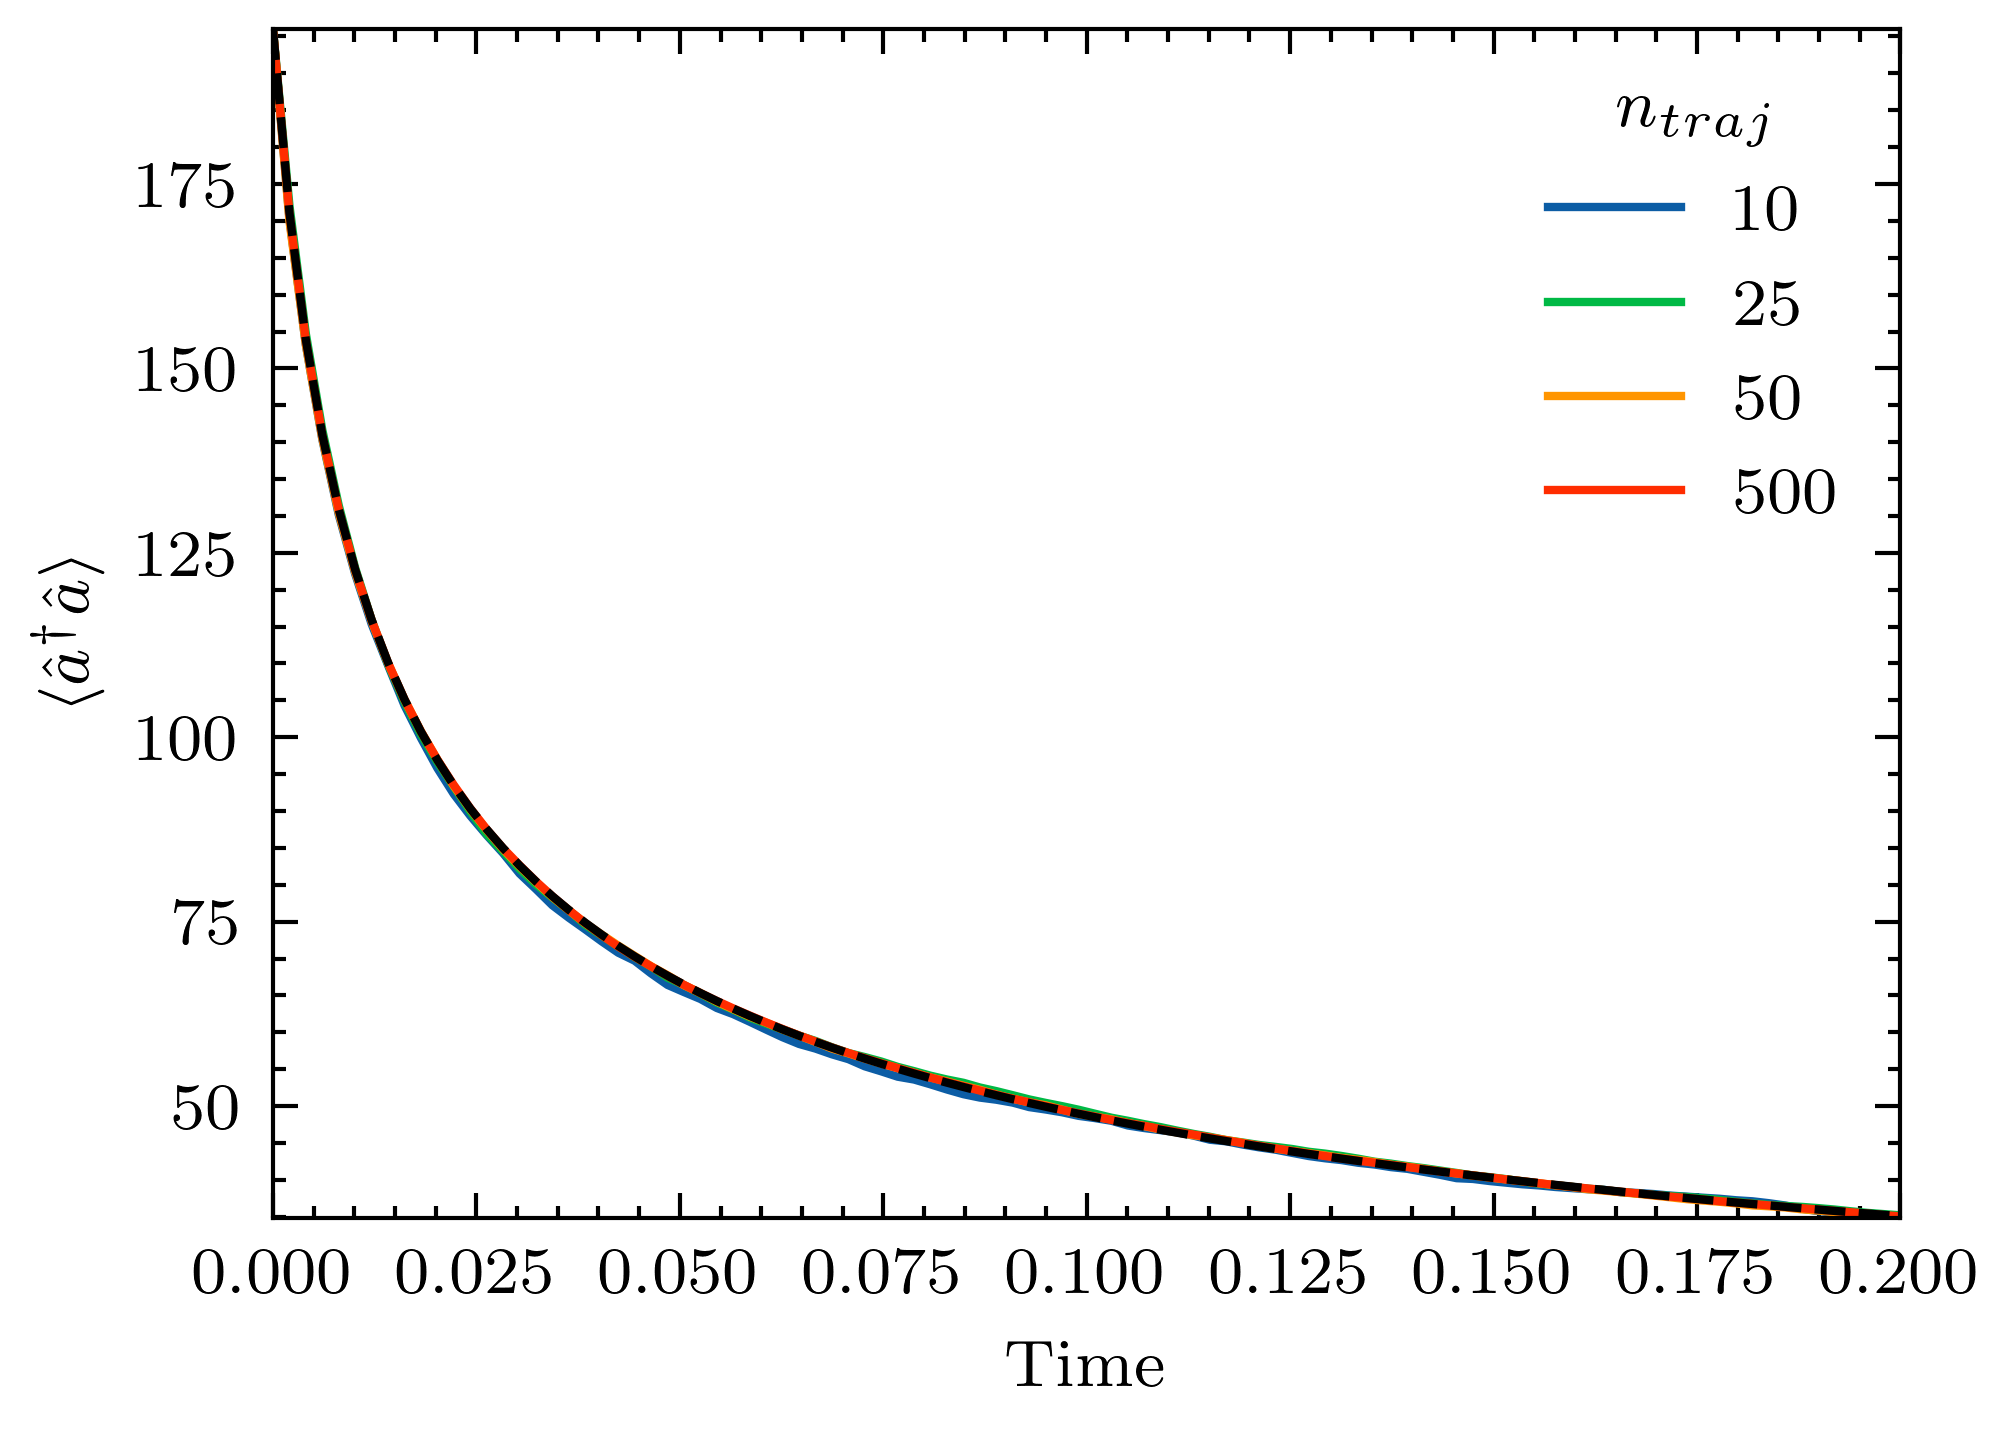

In [21]:
fig, ax = plt.subplots()


ax.plot(times, sol_QMC_10.expect[0], label="10")
ax.plot(times, sol_QMC_25.expect[0], label="25")
ax.plot(times, sol_QMC_50.expect[0], label="50")
ax.plot(times, sol_QMC_500.expect[0], label="500")
ax.plot(times, qt.expect(qt.num(dims), sol_DI), linestyle="--", color="black")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{a}^\\dagger \\hat{a} \\rangle$")
# ax.set_xlim([0, 0.6])
# ax.set_ylim([0, 1.05])
ax.legend(title = "$n_{traj}$", loc=0)


# fig.savefig("DI_QMC_comparison2_gamma1=10.pdf")
# fig.savefig("DI_QMC_comparison2_gamma1=10.png", dpi=300)